<h1> Iris Species Classification </h1>
- store in ./dataset/iris.csv
- 150 sample of Iris in 3 species ( 50/specie )
- The columns in this dataset are:
    1. Id
    2. SepalLengthCm
    3. SepalWidthCm
    4. PetalLengthCm
    5. PetalWidthCm
    6. Species


- Dataset from: https://www.kaggle.com/uciml/iris

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
# print( sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import f1_score, classification_report, make_scorer

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
np.random.seed(30)

C:\Users\taratep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\taratep\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<h3> อ่านข้อมูลจาก Dataset </h3>

In [2]:
df = pd.read_csv('./dataset/iris.csv', index_col=False)
df = df.drop('Id', 1)
df.sample(10)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
20             5.4           3.4            1.7           0.2      Iris-setosa
5              5.4           3.9            1.7           0.4      Iris-setosa
3              4.6           3.1            1.5           0.2      Iris-setosa
101            5.8           2.7            5.1           1.9   Iris-virginica
82             5.8           2.7            3.9           1.2  Iris-versicolor
80             5.5           2.4            3.8           1.1  Iris-versicolor
123            6.3           2.7            4.9           1.8   Iris-virginica
145            6.7           3.0            5.2           2.3   Iris-virginica
74             6.4           2.9            4.3           1.3  Iris-versicolor
107            7.3           2.9            6.3           1.8   Iris-virginica

In [3]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

<h3> แบ่งข้อมูลเป็น Feature กับ Class </h3>

In [4]:
X = df.loc[:, :'PetalWidthCm']
Y = df.Species

print('feature size: ', X.shape )
print('label size: ', Y.shape )

feature size:  (150, 4)
label size:  (150,)


<h3> กำหนดข้อมูลฝึกและวัดประสิทธิภาพอย่างง่าย </h3>

In [5]:
# แบ่งข้อมูลฝึกกับข้อมูลทดอบ
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# สร้างโมเดลในการจำแนก
clf = KNeighborsClassifier().fit(X_train, Y_train)

# จำแนกประเภท
pred = clf.predict(X_test)

# รายงานผล
print('Interm of Accuracy')
print(clf.score(X_test, Y_test))
print()
print('================')
print()
print("In term of F-Measure")
print(classification_report(Y_test, pred))


Interm of Accuracy
0.95


In term of F-Measure
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.96      0.92      0.94        26
 Iris-virginica       0.90      0.95      0.92        19

    avg / total       0.95      0.95      0.95        60



หาความน่าจะเป็นของแต่ละคลาส

In [6]:
probs = clf.predict_proba(X_test)
print(clf.classes_)
print(probs[:10])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 0.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.6  0.4]
 [ 0.   0.   1. ]
 [ 0.   0.   1. ]
 [ 1.   0.   0. ]
 [ 1.   0.   0. ]
 [ 0.   0.8  0.2]
 [ 0.   0.   1. ]]


<h3> กำหนดพารามิเตอในการวัดประสิทธิภาพ </h3>
<hr>
- ใช้ K-Fold 10 ครั้ง ( https://en.wikipedia.org/wiki/Cross-validation_(statistics) )
- วัดผลด้วยวิธีการ F-measure  ( https://en.wikipedia.org/wiki/F1_score )

การทำ Cross-validation ใน Scikit: http://scikit-learn.org/stable/modules/cross_validation.html <br>
การวัดประสิทธิภาพโมเดลใน Scikit: http://scikit-learn.org/stable/modules/model_evaluation.html

In [7]:
scoring = f1_score
skf= StratifiedKFold(n_splits=5)

In [8]:
clf = KNeighborsClassifier()
score = cross_val_score(clf, X, Y, cv=skf)
# score
score.mean()

0.97333333333333338

<h3> ค้นหาพารามิเตอร์ที่ดีที่สุด </h3>

- GridSearchCV: (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [15]:
tuned_parameters = {'p':[1,2], 'n_neighbors':[1,3,5,7,9]}
scoring = make_scorer(f1_score)
skf= StratifiedKFold(n_splits=5, shuffle=True)

print( tuned_parameters )
print()
print( scoring )
print()
print( skf )

{'p': [1, 2], 'n_neighbors': [1, 3, 5, 7, 9]}

make_scorer(f1_score)

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


In [22]:
est = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10, scoring='f1_micro')
est.fit(X_train, Y_train)
est.grid_scores_

[mean: 0.95556, std: 0.05568, params: {'n_neighbors': 1, 'p': 1},
 mean: 0.96667, std: 0.05006, params: {'n_neighbors': 1, 'p': 2},
 mean: 0.97778, std: 0.04535, params: {'n_neighbors': 3, 'p': 1},
 mean: 0.97778, std: 0.04535, params: {'n_neighbors': 3, 'p': 2},
 mean: 0.97778, std: 0.04385, params: {'n_neighbors': 5, 'p': 1},
 mean: 0.97778, std: 0.05000, params: {'n_neighbors': 5, 'p': 2},
 mean: 0.97778, std: 0.04385, params: {'n_neighbors': 7, 'p': 1},
 mean: 0.97778, std: 0.05000, params: {'n_neighbors': 7, 'p': 2},
 mean: 0.97778, std: 0.04385, params: {'n_neighbors': 9, 'p': 1},
 mean: 0.97778, std: 0.04385, params: {'n_neighbors': 9, 'p': 2}]

In [23]:
clf = est.best_estimator_
print( clf )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')


<h3> Save & Load Model </h3>
- http://scikit-learn.org/stable/modules/model_persistence.html

In [12]:
from sklearn.externals import joblib

joblib.dump(clf, 'knn_iris.pkl') 
clf_new = joblib.load('knn_iris.pkl') 
clf_new

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')

<h3> Visualize classifier decision boundaries in 2D Feature space </h3>

In [24]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

print( x )
print( y )

print(list(zip(xv.ravel(), yv.ravel())))

[ 0.   0.5  1. ]
[ 0.  1.]
[(0.0, 0.0), (0.5, 0.0), (1.0, 0.0), (0.0, 1.0), (0.5, 1.0), (1.0, 1.0)]


(90, 2)
(446, 836)
(446, 836)
	x: -2.10104153221 y: -3.7695710079
	x: -2.05104153221 y: 4.4304289921
	x: -1.99104153221 y: 4.2704289921
	x: -1.93104153221 y: 4.1104289921
	x: -1.87104153221 y: 3.9504289921
	x: -1.81104153221 y: 3.7904289921
	x: -1.75104153221 y: 3.6304289921
	x: -1.69104153221 y: 3.4704289921
	x: -1.63104153221 y: 3.3104289921
	x: -1.57104153221 y: 3.1504289921
	x: -1.51104153221 y: 2.9904289921
	x: -1.45104153221 y: 2.8304289921
	x: -1.39104153221 y: 2.6704289921
	x: -1.33104153221 y: 2.5104289921
	x: -1.27104153221 y: 2.3504289921
	x: -1.21104153221 y: 2.1904289921
	x: -1.15104153221 y: 2.0304289921
	x: -1.09104153221 y: 1.8704289921
	x: -1.03104153221 y: 1.7104289921
	x: -0.971041532215 y: 1.5504289921
0.916666666667


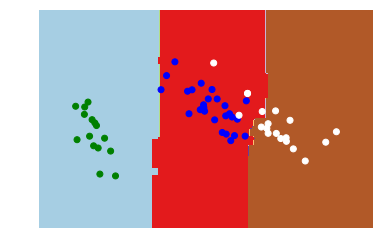

In [14]:
h = 0.01

# reduce Dimension of Dataset to 2D
X_new = PCA(n_components=2, svd_solver='full').fit_transform(X_train)
print(X_new.shape)

# create Decision Model
clf = RandomForestClassifier().fit(X_new, Y_train)
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
print(xx.shape)
print(yy.shape)
for x in list(zip(xx.ravel(), yy.ravel()))[:100000:5000]:
    print('\tx: %s y: %s'%x[::-1])


# Reduce Testset to 2D
X_new = PCA(n_components=2, svd_solver='full').fit_transform(X_test)
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
classes = {'Iris-setosa':'green', 'Iris-versicolor':'blue', 'Iris-virginica':'white'}
colors = [classes[x] for x in Y_test]
print(clf.score(X_new, Y_test))

# Visualize
prob = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
pred = np.argmax(prob, axis=1)
pred = pred.reshape(xx.shape)
plt.contourf(xx, yy, pred, cmap=plt.cm.Paired)
plt.axis('off')
plt.scatter(X_new[:, 0], X_new[:, 1], c=colors, cmap=plt.cm.Paired)
plt.show()